<div style="border:solid Purple 2px; padding: 40px">

<b>Привет, Армен!👋

Меня зовут Эльвира, я буду ревьюером твоего проекта. Предлагаю общаться на «ты», но если это не удобно - дай мне знать, и мы перейдем на «вы».


Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:


<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Такими комментариями я буду помечать отлично проделаную работу😉
</div>
    
<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
        
В таких комментариях я постараюсь подсказать тебе более элегантное или легкое решение, некоторые хитрости и фишки. Части проекта, помеченные такими комментариями, можно не исправлять, но рекомендую обратить на них внимание.</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>
    
В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Если ты видишь такой комментарий, значит здесть есть недочет, который следует исправить.
</div>

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница🙃
    
`<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>`

Чтобы сделать подобный блок, кликни здесь дважды и скопируй всю предыдущую строку ;)
    
Пожалуйста, не удаляй и не перемещай мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта.</div></b>

# Статистический анализ данных

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

1. Без подписки:
      - абонентская плата отсутствует;
      - стоимость одной минуты поездки — 8 рублей;
      - стоимость старта (начала поездки) — 50 рублей;


2. С подпиской Ultra:
      - абонентская плата — 199 рублей в месяц;
      - стоимость одной минуты поездки — 6 рублей;
      - стоимость старта — бесплатно.



<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
    
Введение можно улучшить, если в описании проекта мы добавим основные задачи, особенно с позиции бизнес задачи, которая решается, описание данных и краткий план работы, основные этапы, которые мы должны выполнить.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import binom, poisson, norm
from math import factorial, sqrt

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
 
Молодец, что загружаешь все библиотеки в начале проекта. Так сложней случайно удалить ячейку с загрузкой нужной библиотеки и сделать код не работающим. А получатель отчета сразу поймет, какие библиотеки ты используешь и какие ему нужно установить для запуска проекта.

Все ли библиотеки используются? Лучше оставить только используемые в данном проекте)
</div>

#### Шаг 1. Загрузка данных

In [2]:
try:
    data_users = pd.read_csv('/datasets/users_go.csv')
    data_rides = pd.read_csv('/datasets/rides_go.csv')
    data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
    
except:
    data_users = pd.read_csv('users_go.csv')
    data_rides = pd.read_csv('rides_go.csv')
    data_subscriptions = pd.read_csv('subscriptions_go.csv')


In [3]:
# функция получения информации о датафрейме
def info_dataframe(dataframe):
    print('Отображение таблицы:')
    display(dataframe.head())
    print()
    print('Общая иинформация:')
    display(dataframe.info())
    print()
    print('Пропуски в таблице:')
    display(dataframe.isna().sum())
    print()
    print('Дубликаты в таблице:', dataframe.duplicated().sum())


In [4]:
# вспомогательная функция для отображения дубликатов и пропусков
def dataframe_duplicated_isna(dataframe):
    print('Пропуски в таблице:')
    display(dataframe.isna().sum())
    print()
    print('Дубликаты в таблице:', dataframe.duplicated().sum())


<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
 
Здорово, что используешь функции для автоматизации) 

**Таблица "пользователи" (users_go)**

In [5]:
info_dataframe(data_users)

Отображение таблицы:


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



Общая иинформация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None


Пропуски в таблице:


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


Дубликаты в таблице: 31


**Таблица "поездки" (rides_go)**

In [6]:
info_dataframe(data_rides)

Отображение таблицы:


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28



Общая иинформация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None


Пропуски в таблице:


user_id     0
distance    0
duration    0
date        0
dtype: int64


Дубликаты в таблице: 0


**Таблица "подписки" (subscriptions_go)**

In [7]:
info_dataframe(data_subscriptions)

Отображение таблицы:


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



Общая иинформация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None


Пропуски в таблице:


subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Дубликаты в таблице: 0


**Вывод:**

1. Данные загрузились:
    - данные о пользователях: **1565** записей и **5** колонок;
    - данные о поездках: **18068** записей и **4** колонок;
    - данные о подписках: **2** записей и **4** колонок;


2. В таблице "поездки" (rides_go):
   - поле `data` имеет тип `object`, а должен быть `datetime`


3. Пропуски не обнаруженны.


4. Дубликаты обнаруженны:
    - `users_go`: **31**

#### Шаг 2. Предобработка данных

**Датафрейм users_go**

Описание:
- `user_id` - уникальный идентификатор пользователя
- `name` -	имя пользователя
- `age`  -	возраст
- `city` -	город
- `subscription_type` -	тип подписки (free, ultra)

In [8]:
# проверим на дубликаты и пропуски еще раз
dataframe_duplicated_isna(data_users)

Пропуски в таблице:


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


Дубликаты в таблице: 31


In [9]:
# Удалим дубликаты
data_users = data_users.drop_duplicates()

In [10]:
# перепроверим на наличие дубликатов еще раз
dataframe_duplicated_isna(data_users)

Пропуски в таблице:


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


Дубликаты в таблице: 0


In [11]:
# посмотрим столбец city и оценим записи
print('Уникальные записи: ', len(data_users['city'].unique()))
print('---' * 10)
print(data_users['city'].value_counts())

Уникальные записи:  8
------------------------------
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


**Датафрейм rides_go**

Описание:

- `user_id` -	уникальный идентификатор пользователя
- `distance` -	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` -	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` -	дата совершения поездки

In [12]:
# проверим на дубликаты и пропуски еще раз
dataframe_duplicated_isna(data_rides)

Пропуски в таблице:


user_id     0
distance    0
duration    0
date        0
dtype: int64


Дубликаты в таблице: 0


In [13]:
# Приведите столбец date к типу даты.
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

In [14]:
# проверим формат данных у date
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [15]:
# Создадим новый столбец с номером месяца на основе столбца date.
data_rides['month'] = data_rides['date'].dt.month

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
    
Будет хорошо проверить за какой период представлены данные, чтобы убедиться что данные за несколько лет не склеиются при агрегации по месяцам.

In [16]:
# проверим, что столбец с номером месяца создался корректно
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**Датафрейм subscriptions_go**

Описание:

- `subscription_type` -	тип подписки
- `minute_price` -	стоимость одной минуты поездки по данной подписке
- `start_ride_price` -	стоимость начала поездки
- `subscription_fee` -	стоимость ежемесячного платежа


In [17]:
# проверим на дубликаты и пропуски еще раз
dataframe_duplicated_isna(data_subscriptions)

Пропуски в таблице:


subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Дубликаты в таблице: 0


In [18]:
# посмотрим столбец subscription_type и оценим записи
print('Уникальные записи: ', len(data_subscriptions['subscription_type'].unique()))
print('---' * 10)
print(data_subscriptions['subscription_type'].value_counts())

Уникальные записи:  2
------------------------------
free     1
ultra    1
Name: subscription_type, dtype: int64


**Вывод:**

1. Обнаруженные дубликаты в датафрейме `users_go` удалены. 
2. Тип данных в столбце `date` изменен на `datetime`.
3. Создан новый столбец `month` в датафрейме `rides_go` с номером месяца на основе столбца `date`.
4. Пропущенных значений не обнаруженно.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 <a class="tocSkip"> </h2>

Блок предобработки выполнен хорошо: необходимые столбцы добавлены, типы скорректированы, есть проверка на пропуски и дубликаты, молодец)
</div>

#### Шаг 3. Исследовательский анализ данных

**3.1 Частота встречаемости городов**

In [19]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [20]:
dataframe_user_city = data_users.pivot_table(index='city', values='user_id', aggfunc='count') \
.sort_values(by='user_id', ascending=False)

In [21]:
dataframe_user_city

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


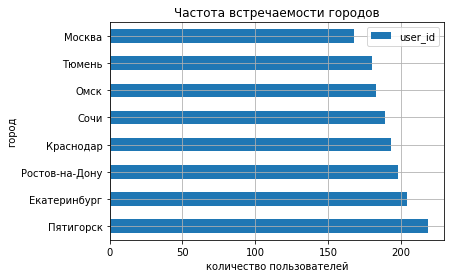

In [22]:
dataframe_user_city.plot(kind='barh', grid=True)
plt.title('Частота встречаемости городов')
plt.xlabel('количество пользователей')
plt.ylabel('город')
plt.show()

- Больше всего пользователей из Пятигорска: 219
- Меньше всего пользователей из Москвы: 168
- Всего датафрейм содержит данные о пользователях из 8 городов.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 <a class="tocSkip"> </h2>

Отлично)

**3.2 Соотношение пользователей с подпиской и без подписки**

In [23]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [24]:
dataframe_subs = data_users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')

In [25]:
dataframe_subs

,user_id
subscription_type,
free,835
ultra,699


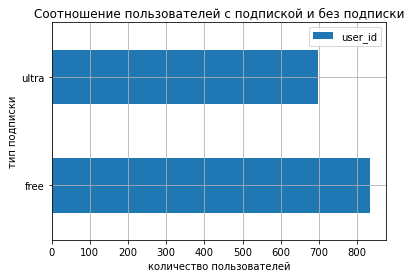

In [26]:
dataframe_subs.plot(kind='barh', grid=True)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.xlabel('количество пользователей')
plt.ylabel('тип подписки')
plt.show()

- Количество пользователей без подписки: 835
- Количество пользователей с подпиской: 699

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>

Необходимо добавить расчет с долей)

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
    
Можно использовать круговую диаграмму

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавим расчет с долей</div>

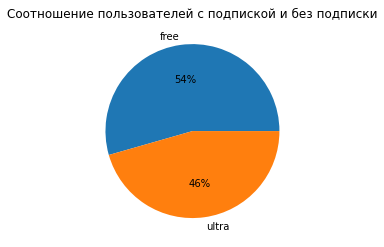

In [27]:
data_users.groupby('subscription_type')['user_id'].count().plot(kind='pie', autopct='%1.0f%%', ylabel='')
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

In [28]:
coeff_ultra_free = round(data_users.query('subscription_type == "ultra"')['subscription_type'].count()/data_users.query('subscription_type == "free"')['subscription_type'].count(), 3)
print('Соотношение пользователей с подпиской и без подписки:', coeff_ultra_free)

Соотношение пользователей с подпиской и без подписки: 0.837


**3.3 Возраст пользователей**

In [29]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [30]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [31]:
data_users.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)

,user_id
age,
25,145
24,132
26,131
23,129
27,119
22,119
28,112
21,93
20,71


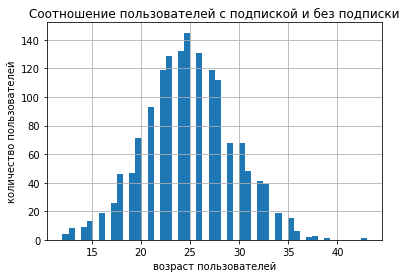

In [30]:
data_users['age'].plot(kind='hist', grid=True, bins=50)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.xlabel('возраст пользователей')
plt.ylabel('количество пользователей')
plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>

Нужно скорректировать кол-во корзин, чтобы не было дыр на графике)

<div class="alert alert-info"> <b>Комментарий студента:</b> Скорректировал количество корзин(bins)</div>

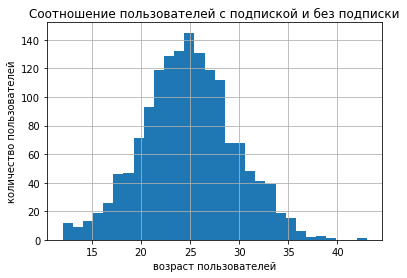

In [32]:
data_users['age'].plot(kind='hist', grid=True, bins=30)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.xlabel('возраст пользователей')
plt.ylabel('количество пользователей')
plt.show()

- Максимальный возраст составляет 43 года.
- Минимальный возрвст составляет 12 лет.
- Медиана и средний возрвст почти совпадают и составляют: медиана - 25 и средний - 24.9
- Выборка имеет нормальное распределение.

**3.4 Расстояние, которое пользователь преодолел за одну поездку**

In [33]:
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [34]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

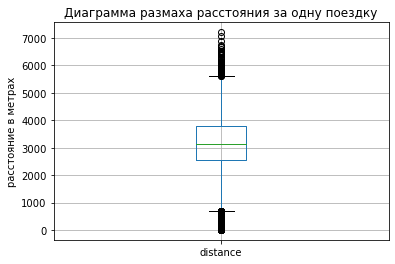

In [35]:
data_rides.boxplot(column='distance')
plt.title('Диаграмма размаха расстояния за одну поездку')
plt.ylabel('расстояние в метрах')
plt.show()

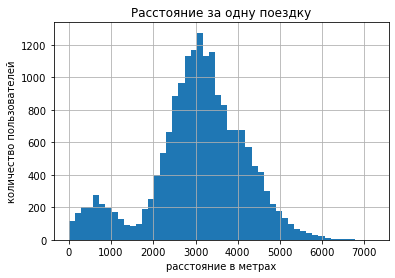

In [36]:
data_rides['distance'].plot(kind='hist', grid=True, bins=50)
plt.title('Расстояние за одну поездку')
plt.xlabel('расстояние в метрах')
plt.ylabel('количество пользователей')
plt.show()

- Медиана и среднее расстояние почти идентичны. 
- Среденее расстояние немного больше 3 километров. 
- Не большой пик примерно в диапазоне 500 - 600 метров. Возможно это расстояние например от работы до метро или от дома до остановки. 

**3.5 Продолжительность поездок**

In [37]:
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [38]:
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

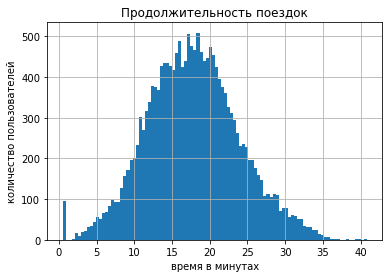

In [39]:
data_rides['duration'].plot(kind='hist', grid=True, bins=100)
plt.title('Продолжительность поездок')
plt.xlabel('время в минутах')
plt.ylabel('количество пользователей')
plt.show()

- Среднее время поездки 17.8 минут.
- Медиана времени поездки составляет 17.7 минут


**Вывод:**
1. Частота встречаемости городов:
    - Больше всего пользователей из Пятигорска: 219
    - Меньше всего пользователей из Москвы: 168
    - Всего датафрейм содержит данные о пользователях из 8 городов.
   
   
2. Соотношение пользователей с подпиской и без подписки:
    - Количество пользователей без подписки: 835
    - Количество пользователей с подпиской: 699


3. Возраст пользователей:
    - Максимальный возраст составляет 43 года.
    - Минимальный возрвст составляет 12 лет.
    - Медиана и средний возрвст почти совпадают и составляют: медиана - 25 и средний - 24.9
    - Выборка имеет нормальное распределение.
    
    
4. Расстояние, которое пользователь преодолел за одну поездку:
    - Медиана и среднее расстояние почти идентичны. 
    - Среденее расстояние немного больше 3 километров. 
    - Не большой пик примерно в диапазоне 500 - 600 метров. Возможно это расстояние например от работы до метро или от дома до остановки. 
    
    
5. Продолжительность поездок:
    - Среднее время поездки 17.8 минут.
    - Медиана времени поездки составляет 17.7 минут
    - Выборка похожа на нормально распределение. 

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Отличная работа по исследовательскому анализу! Молодец, что используешь и боксплоты и метод .describe(), а также гистограммы для работы)

#### Шаг 4. Объединение данных

**4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм.**

In [40]:
users_rides_subs = data_users.merge(data_rides, on='user_id').merge(data_subscriptions, on='subscription_type')

In [45]:
display(users_rides_subs)


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>
    
Необходимо провести проверку размерности датафрейма после объединения и проверку на пропуски в объединенном датасете.

<div class="alert alert-info"> <b>Комментарий студента:</b> Проверка на пропуски и общая иинформация о датасете.</div>

In [42]:
display(users_rides_subs.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [43]:
display(users_rides_subs.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


None

**4.2 Создать ещё два датафрейма из датафрейма, созданного на этапе объедините данные о пользователях, поездках и подписках в один датафрейм:**
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [46]:
dataframe_free_subs = users_rides_subs[users_rides_subs['subscription_type'] == 'free']

In [47]:
dataframe_ultra_subs = users_rides_subs[users_rides_subs['subscription_type'] == 'ultra']

In [48]:
dataframe_free_subs.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [49]:
dataframe_ultra_subs.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


**4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.**

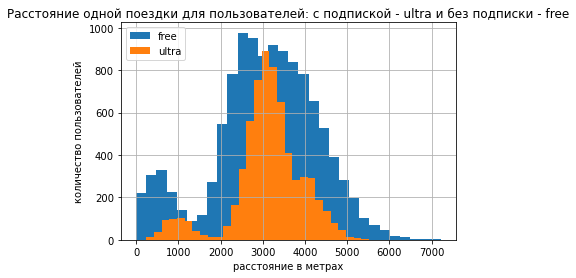

In [50]:
dataframe_free_subs['distance'].plot(kind='hist', grid=True, bins=30, label='free')
dataframe_ultra_subs['distance'].plot(kind='hist', grid=True, bins=30, label='ultra')

plt.title('Расстояние одной поездки для пользователей: с подпиской - ultra и без подписки - free')
plt.xlabel('расстояние в метрах')
plt.ylabel('количество пользователей')
plt.legend(loc='upper left')
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Здорово, что совмещаешь распределения, также можно добавить параметр alpha, чтобы настроить прозрачность)

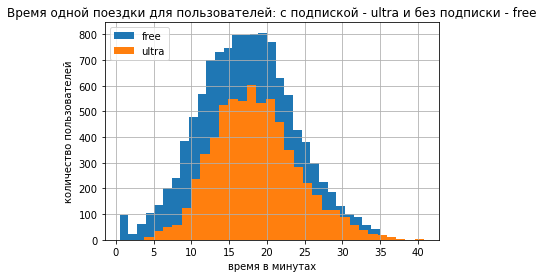

In [51]:
dataframe_free_subs['duration'].plot(kind='hist', grid=True, bins=30, label='free')
dataframe_ultra_subs['duration'].plot(kind='hist', grid=True, bins=30, label='ultra')

plt.title('Время одной поездки для пользователей: с подпиской - ultra и без подписки - free')
plt.xlabel('время в минутах')
plt.ylabel('количество пользователей')
plt.legend(loc='upper left')
plt.show()

**Вывод:**

- Объединили данные о пользователях, поездках и подписках в один датафрейм.
- Создали ещё два датафрейма из датафрейма с данными о пользователях с подпиской и без подписки.
- Пользователи без подписок совершают более длительные поездки, но по времени более равномерно распределены.
- Пользователи с подпиской предпочитают более долгие по времени передвижения, но меньшую дистанцию.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Молодец, что обращаешь внимание на сходства или различия профилей пользователей с платной и бесплатной подписками.

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>

Здесь тоже можно использовать метод describe() для расчета описательных статистик.

#### Шаг 5. Подсчёт выручки

**5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4:** 
- найдите суммарное расстояние;
- количество поездок;
- суммарное время для каждого пользователя за каждый месяц.

In [52]:
users_rides_subs.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [53]:
# округлим время поездки до следующего целого числа и преобразована в целый тип
users_rides_subs['duration'] = np.ceil(users_rides_subs['duration']).astype('int')

In [54]:
agg_users_rides_subs = users_rides_subs.pivot_table(
    index=['user_id','month'],
    
    values=['city', 
            'subscription_type', 
            'distance', 
            'duration', 
            'date', 
            'minute_price', 
            'start_ride_price', 
            'subscription_fee'],
    
    aggfunc={'city':'first',
             'subscription_type':'first',
             'distance':'sum',
             'duration':'sum',
             'date':'count',
             'minute_price':'first',
             'start_ride_price':'first',
             'subscription_fee':'first'},
    fill_value=0
).rename(columns={
    'date':'ride_count',
    'distance': 'distance_sum',
    'duration': 'duration_sum'
})

In [55]:
agg_users_rides_subs.head(20)

city  ride_count  distance_sum  duration_sum  minute_price  \
user_id month                                                                 
1       1      Тюмень           2   7027.511294            42             6   
        4      Тюмень           1    754.159807             7             6   
        8      Тюмень           2   6723.470560            46             6   
        10     Тюмень           2   5809.911100            32             6   
        11     Тюмень           3   7003.499363            56             6   
        12     Тюмень           2   6751.629942            28             6   
2       3        Омск           3  10187.723006            63             6   
        4        Омск           2   6164.381824            40             6   
        6        Омск           1   3255.338202            14             6   
        7        Омск           2   6780.722964            48             6   
        8        Омск           1    923.007439             7             6   
        10       Омск           1   2824.636598            19             6   
        12       Омск           1   3828.248580            12             6   
3       1      Москва           1   3061.777147            13             6   
        2      Москва           2   5421.152016            39             6   
        4      Москва           1   2956.651632            21             6   
        5      Москва           3   9064.026918            63             6   
        7      Москва           3  10919.595403            67             6   
        9      Москва           1   2891.012822            23             6   
        12     Москва           1   2593.381928            13             6   

               start_ride_price  subscription_fee subscription_type  
user_id month                                                        
1       1                     0               199             ultra  
        4                     0               199             ultra  
        8                     0               199             ultra  
        10                    0               199             ultra  
        11                    0               199             ultra  
        12                    0               199             ultra  
2       3                     0               199             ultra  
        4                     0               199             ultra  
        6                     0               199             ultra  
        7                     0               199             ultra  
        8                     0               199             ultra  
        10                    0               199             ultra  
        12                    0               199             ultra  
3       1                     0               199             ultra  
        2                     0               199             ultra  
        4                     0               199             ultra  
        5                     0               199             ultra  
        7                     0               199             ultra  
        9                     0               199             ultra  
        12                    0               199             ultra

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Замечательная работа со сводной таблицей!)

**5.2 Добавить столбец с помесячной выручкой, которую принёс каждый пользователь.**

In [56]:
agg_users_rides_subs['income_month'] = (
    (agg_users_rides_subs['minute_price'] * agg_users_rides_subs['duration_sum']) + \
    (agg_users_rides_subs['ride_count'] * agg_users_rides_subs['start_ride_price']) + \
    agg_users_rides_subs['subscription_fee']
)

In [57]:
agg_users_rides_subs

city  ride_count  distance_sum  duration_sum  \
user_id month                                                      
1       1         Тюмень           2   7027.511294            42   
        4         Тюмень           1    754.159807             7   
        8         Тюмень           2   6723.470560            46   
        10        Тюмень           2   5809.911100            32   
        11        Тюмень           3   7003.499363            56   
...                  ...         ...           ...           ...   
1534    6      Краснодар           2   3409.468534            26   
        8      Краснодар           2   7622.453034            48   
        9      Краснодар           1   4928.173852            23   
        11     Краснодар           4  13350.015305            78   
        12     Краснодар           1   2371.711192            16   

               minute_price  start_ride_price  subscription_fee  \
user_id month                                                     
1       1                 6                 0               199   
        4                 6                 0               199   
        8                 6                 0               199   
        10                6                 0               199   
        11                6                 0               199   
...                     ...               ...               ...   
1534    6                 8                50                 0   
        8                 8                50                 0   
        9                 8                50                 0   
        11                8                50                 0   
        12                8                50                 0   

              subscription_type  income_month  
user_id month                                  
1       1                 ultra           451  
        4                 ultra           241  
        8                 ultra           475  
        10                ultra           391  
        11                ultra           535  
...                         ...           ...  
1534    6                  free           308  
        8                  free           484  
        9                  free           234  
        11                 free           824  
        12                 free           178  

[11331 rows x 9 columns]

In [58]:
print(np.ceil(agg_users_rides_subs.groupby('subscription_type')['income_month'].mean()))

subscription_type
free     329.0
ultra    363.0
Name: income_month, dtype: float64


In [59]:
agg_users_rides_subs.describe()

,ride_count,distance_sum,duration_sum,minute_price,start_ride_price,subscription_fee,income_month
count,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000
mean,1.594564,4896.362584,29.186127,7.199894,29.997352,79.610537,342.303504
std,0.831604,2911.516556,16.752464,0.979861,24.496519,97.496144,153.875346
min,1.000000,2.570787,1.000000,6.000000,0.000000,0.000000,58.000000
25%,1.000000,2972.202146,17.000000,6.000000,0.000000,0.000000,234.000000
50%,1.000000,3988.723985,24.000000,8.000000,50.000000,0.000000,319.000000
75%,2.000000,6421.375890,38.000000,8.000000,50.000000,199.000000,415.000000
max,7.000000,23429.487786,143.000000,8.000000,50.000000,199.000000,1444.000000


In [54]:
round(agg_users_rides_subs['distance_sum'].sum(), 2)

55480684.44

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>

Можно провести дополнительное исследование выручки: построить распределения по тарифам

**Вывод:**
1. Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными.
2. В датафрейм добавлен столбец с помесячной выручкой, которую принёс каждый пользователь.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Выручка рассчитана верно, молодец!)

#### Шаг 6. Проверка гипотез

**Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.**

**6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.**

Сравнием два датафрейма `dataframe_free_subs` и  `dataframe_ultra_subs` и проверим гипотезы:
- Нулевая гипотеза: среднее время поездок пользователей без подписок и с подписками равны;
- Альтернативная гипотеза: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

In [60]:
alpha = 0.05

result = st.ttest_ind(dataframe_ultra_subs['duration'], dataframe_free_subs['duration'], alternative='greater')

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')


p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


In [61]:
# проверяем 
print('Среднее время поездки пользователей с подпиской', round(dataframe_ultra_subs['duration'].mean(), 1))
print('Среднее время поездки пользователей без подпиской', round(dataframe_free_subs['duration'].mean(), 1))

Среднее время поездки пользователей с подпиской 18.5
Среднее время поездки пользователей без подпиской 17.4


Гипотеза верна: среднее время поездок пользователей с подпиской больше, чем у пользователей без подписок.
Различие между двумя гипотезами не случайное, значит нулевую гипотезу можно отклонить.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Гипотезы составлены верно, и тест проведен правильно)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>

Мы не можем утверждать, что гипотеза верна, так как мы проверили гипотезы на основе ВЫБОРОК. Поскольку нулевая гипотеза выдвигается на основе анализа ВЫБОРОЧНЫХ данных, то она может оказаться как правильной, так и неправильной. Более того, мы не сможем на 100% гарантировать её истинность либо ложность даже после статистической проверки! Ибо любая, самая «надёжная» выборка все равно остаётся выборкой и может нас дезинформировать (пусть с очень малой вероятностью). Т.е. мы смогли бы так утверждать, если бы проверили всевозможные поездки. Но т.к. мы проверяли лишь небольшую выборку, у нас лишь есть основания полагать, что эти выборки равны. 
    
Корректнее написать о том, что у нас нет/есть оснований утверждать,среднее время поездок пользователей с подпиской больше, чем у пользователей без подписок. Такие выводы очень важная часть статистических анализов. Поэтому давай исправим)
    
Если будет интересно, то вот пара ссылок на доп. материалы по статистике:</s>

http://www.mathprofi.ru/statisticheskie_gipotezy.html

https://allatambov.github.io/psms/pdf/hypo-test.pdf </div>

<div class="alert alert-info"> <b>Комментарий студента:</b>Корректное описание вывода гипотезы</div>

По результатам данной гипотезе мы можем утверждать, что среднее время поездок пользователя с подпиской больше, чем у пользователей без подписок. 

**6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.**

Датафрейм `dataframe_ultra_subs` и проверим гипотезы:
- Нулевая гипотеза: среднее расстояние поездки пользователей с подпиской равна 3130 метров;
- Альтернативная гипотеза: среднее расстояние поездки пользователей с подпиской меньше 3130 метров;

In [57]:
interested_value = 3130

alpha = 0.05

results = st.ttest_1samp(
    dataframe_ultra_subs['distance'], 
    interested_value,
      alternative='less')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.08046311521502146
Не получилось отвергнуть нулевую гипотезу


In [63]:
# проверка
print('Среднее расстояние поездки пользователей с подпиской', round(dataframe_ultra_subs['distance'].mean(), 1))

Среднее расстояние поездки пользователей с подпиской 3115.4


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2> 
   
Поскольку оптимальное расстояние по износу составляет 3130 м, значит большее расстояние приводит к повышенному износу самоката. Следовательно, имеет смысл сформулировать альтернативную гипотезу "Подписчики в среднем проезжают расстояние больше оптимального" и соответственно в статистическом тесте использовать параметр alternative = 'greater'.
    

<div class="alert alert-info"> <b>Комментарий студента:</b> Изменение параметра alternative</div>

In [62]:
interested_value = 3130

alpha = 0.05

results = st.ttest_1samp(
    dataframe_ultra_subs['distance'], 
    interested_value,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Действительно  среднее расстояние поездки пользователей с подпиской меньше 3130 метров. Так как р-значение больше уровня статической значимости, нет причин, чтобы отвергнуть нулевую гипотезу.

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
    
Вывод стоит сформулировать применительно к запросу бизнеса: с точки зрения износа самоката.

**6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.**

Сравнием два датафрейма `dataframe_free_subs` и  `dataframe_ultra_subs` и проверим гипотезы:
- Нулевая гипотеза: помесячная выручка от пользователей с подпиской и без подписки равны;
- Альтернативная гипотеза: помесячная выручка от пользователей с подпиской больше чем у пользователей без подписки.

In [64]:
# две выборки с подсчитаной помесячной выручкой
agg_free_subs = agg_users_rides_subs[agg_users_rides_subs['subscription_type'] == 'free']
agg_ultra_subs = agg_users_rides_subs[agg_users_rides_subs['subscription_type'] == 'ultra']

alpha = 0.05

result = st.ttest_ind(agg_ultra_subs['income_month'], agg_free_subs['income_month'], alternative='greater')

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')


p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


In [65]:
# проверка
print('Среднее помесячная выручка пользователей с подпиской', round(agg_ultra_subs['income_month'].mean(), 2))
print('Среднее помесячная выручка пользователей без подписок', round(agg_free_subs['income_month'].mean(), 2))

Среднее помесячная выручка пользователей с подпиской 362.79
Среднее помесячная выручка пользователей без подписок 328.64


Можем отвергнуть нулевую гипотезу, так как р-значение меньше заданного уровня значимости. 
Помесячная выручка у пользователей с подпиской больше чем у пользователей без подписок.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Статистический анализ проведен верно)

**6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

Некоторые пользователи могут содержаться в двух выборках: до обновления и после обновления.
Выборки не будут независимыми, применим ttest_rel(alternative='less'). Гипотеза будет односторонней.

Нулевая гипотеза: число обращений остался на том же уровне;
Альтернативная гипотеза: число обращений уменьшилось.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Верно)

**Вывод:**

1. Среднее время поездок пользователей с подпиской больше, чем у пользователей без подписок. Получается, что пользователи с подпиской активнее используют сервис и проводят время на самокатах больше. 

2. Среднее расстояние поездки пользователей с подпиской меньше 3130 метров. Разнообразие длинных и коротких поездок может быть вызвано различными целями, погодными условиями или например расстояниями до заданных точек поездки.  

3. Помесячная выручка у пользователей с подпиской больше чем у пользователей без подписок. Значит что подписки приносят дополнительный доход в том числе с учетом месячной платы.


Получается, что пользователи с подпиской более выгодней в плане: 
- времени проведенного в пути,
- месячной выручки.


#### Шаг 7. Распределения

**7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.**

Воспользуемся биномиальным распределением

<BarContainer object of 1001 artists>

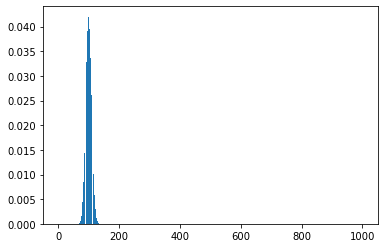

In [66]:
n = 1000 # количество попыток
p = 0.1 # вероятность успеха

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k) 
    distr.append(prob)
    
plt.bar(range(0, n + 1), distr)

In [67]:
# в диапазоне (n-500, n+500) определим инимальное кол-во промокодов
for n in range(500, 1500):
    if binom.cdf(100, n, p) < 0.05:
        print('Минимальное число промокодов:', n)
        break

Минимальное число промокодов: 1172


Для акции раздачи промокодов цель которого получить не менее 100 продлений подписок, с вероятностью невыполнения не больше 5%, необходимо сделать рассылку не менее 1172 промокодов.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Верно)

**7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.**

Аппроксимируем биномиальное распределение нормальным 

In [68]:
n = 1000000
p = 0.4

mu = n * p
sigma = sqrt(n * p * (1 - p))

distr = st.norm(mu, sigma) 

x = 399500

# считаем вероятность получить значение, равное x или меньше 
result = distr.cdf(x)

print('Вероятность, что push-уведомления откроют не более 399500 пользователей:', round(result, 2))

Вероятность, что push-уведомления откроют не более 399500 пользователей: 0.15


В условиях акции рассылки 1 млн. push-уведомлений вероятность, что их откроют не более 399500 пользователей составляет 15%.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Очень хорошо)

#### Вывод

**Общий вывод:**

1. Были поставлены задачи:
    - Откройте файл с данными и изучите общую информацию.
    - Предобработка данных, скорректировать типы данных, избавиться от дубликатов.
    - Провести иследовательский анализ данных.
    - Объединение данных.
    - Подсчет выручки
    - Проверка гипотез
    - Распределения


2. Проведена предобработка данных:
    - Обнаруженные дубликаты в датафрейме `users_go` удалены. 
    - Тип данных в столбце `date` изменен на `datetime`.
    - Создан новый столбец `month` в датафрейме `rides_go` с номером месяца на основе столбца `date`.
    - Пропущенных значений не обнаруженно.
    
3. При иследовании данных удалось выяснить:
    - Из 8-ми городов, больше всего пользователей из Пятигорска (**219**), а меньше всего из Москвы (**168**).
    - Соотношение пользователей без подписки (**835**) больше, чем пользователей с подпиской(**699**). Пользователи без подписок совершают более длительные поездки, но по времени более равномерно распределены. Пользователи с подпиской предпочитают более долгие по времени передвижения, но меньшую дистанцию.
    - Средний возраст пользователей 24.9 лет.
    - Среднее расстояние, большинства поездок немного больше 3-х км. составляет примерно 550 м. Возможно это расстояние например от работы до метро или от дома до остановки. 
    - Среднее время поездки составляет 17.8 минут.
    

4. Расчеты:
    - Средняя помесечная выручка компания имеет больше от пользователей с подпиской, чем от пользователей без подписки.
    - Также были подтверждены следующие гипотезы:
        - среднее время поездок пользователей с подпиской больше, чем у пользователей без подписок.
        - среднее расстояние поездки пользователей с подпиской меньше 3130 метров. 
        - помесячная выручка у пользователей с подпиской больше чем у пользователей без подписок.
        
    - Расчеты для отдела маркетинга:
        - для акции раздачи промокодов цель которого получить не менее 100 продлений подписок, с вероятностью невыполнения не больше 5%, необходимо сделать рассылку не менее 1172 промокодов.
        - в условиях акции рассылки 1 млн. push-уведомлений вероятность, что их откроют не более 399500 пользователей составляет 15%.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ⛔️<a class="tocSkip"></h2>
    
В выводе нужно аргументированно ответить на главный вопрос исследования: являются ли пользователи с подпиской более выгодными для компании?

<div class="alert alert-info"> <b>Комментарий студента:</b> Аргументированный вывод</div>

- Пользователи с подпиской проводят больше времени в поездках на самокатах, что является более выгодным для компании.

- Пользователи с подпиской в среднем проезжают на самокате не более 3130 метров за одну поездку, но значение близко к оптимальному с точки зрения износа самоката.

- Месечная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки, это различие статически значимо.

<div style="border:solid Purple 2px; padding: 40px">

<h2> Общий комментарий ревьюера 😊<a class="tocSkip"> </h2>
    <br/>
Ты проделал замечательную работу. Все расчеты проведены совершенно верно, также не могу не выделить аккуратность работы в целом и работу с анализами, функциями и методами!  Однако, есть несколько важных моментов, которые стоит улучшить, чтобы проект стал действительно идеальным!

Необходимо доработать:
    
* Проверка на пропуски
* Выводы по тестам
* Остальные комментарии ты найдешь в работе

**Желаю удачи и жду твой проект на повторное ревью! Если у тебя вдруг есть какие–либо вопросы, то я с радостью отвечу на них 😊**
    
Также оставлю дополнительный материал по визуализации, если будет интересно:
    

* книга Александра Богачева [Графики, которые убеждают всех](https://book24.ru/product/grafiki-kotorye-ubezhdayut-vsekh-5873820/)
* [cheatsheet по визуализации](https://extremepresentation.typepad.com/.a/6a00d8341bfd2e53ef0111683a7591970c-pi)
* бесплатный курс от Яндекс.Практикум [Визуальныe презентации](https://practicum.yandex.ru/visual-presentation/)
* Формат таблиц в pandas с помощью style. В том числе цветовое выделение. (https://habr.com/ru/post/521894/)
* Основные компоненты matplotlib (https://pyprog.pro/mpl/mpl_main_components.html)
* 50 оттенков matplotlib — The Master Plots (с полным кодом на Python) (https://habr.com/ru/post/468295/)
* Построение графиков с использованием двух осей. (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)
* Сайт, подробно представлюящий практически все типы визуализаций. (https://datavizproject.com/)
* Шпаргалка по визуализации данных в Python с помощью Plotly (https://habr.com/ru/post/502958/)
</div> 